In [ ]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from imblearn.combine import *
#필요한 라이브러리 임포트

In [ ]:
df = pd.read_excel('dataset_final.csv')
#sns태그수를 기반으로 정해진 '활성화_여부' 결과변수가 포함된 데이터 불러오기.

In [ ]:
#학습 셋을 위한 전처리
df_data = df.iloc[:,1:]
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1241 entries, 0 to 1240
Data columns (total 27 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   행정동_코드             1241 non-null   float64
 1   행정동명               1241 non-null   object 
 2   상권_구분_코드           1241 non-null   object 
 3   상권_코드              1241 non-null   float64
 4   상권_코드_명            1241 non-null   object 
 5   분기당_매출_금액          1241 non-null   float64
 6   분기당_매출_건수          1241 non-null   float64
 7   건당_매출액_평균          1241 non-null   float64
 8   환산임대료(원, 21년도)     1241 non-null   float64
 9   증감율(%, 19-21년도)    1241 non-null   float64
 10  임대료/매출             1241 non-null   float64
 11  매출/임대료             1241 non-null   float64
 12  점포수                1241 non-null   float64
 13  면적                 1241 non-null   float64
 14  단위면적당 점포 수(k㎡)     1241 non-null   float64
 15  프랜차이즈_점포_수         1241 non-null   float64
 16  개인사업자_수            1241 

In [ ]:
#학습 셋을 위한 전처리
del df_data['행정동_코드']
del df_data['행정동명']
del df_data['상권_구분_코드']
del df_data['상권_코드_명']
del df_data['활성화_여부']
del df_data['상권_코드']
del df_data['개인카페_비율']

In [ ]:
#학습 셋을 위한 전처리
df_labels = df[['상권_코드','활성화_여부']]

In [ ]:
#학습 셋을 위한 전처리
del df_labels['상권_코드']

In [ ]:
def z_score_normalize(lst):
    normalized = []
    for value in lst:
        normalized_num = (value - np.mean(lst)) / np.std(lst)
        normalized.append(normalized_num)
    return normalized
#z-점수 정규화 함수

In [ ]:
for x in df_data.columns:
    df_data[x] = z_score_normalize(df_data[x])
df_data.describe()
#Z-Score Normalization (Z-점수 정규화) 반영

,분기당_매출_금액,분기당_매출_건수,건당_매출액_평균,"환산임대료(원, 21년도)","증감율(%, 19-21년도)",임대료/매출,매출/임대료,점포수,면적,단위면적당 점포 수(k㎡),프랜차이즈_점포_수,개인사업자_수,프랜차이즈 비율,2021년_2030여성_비율평균,2021년_외국인_평균,문화시설수,지하철_역_수,버스_정거장_수,전체_카페_점포_수,개인카페_점포수
count,1.241000e+03,1.241000e+03,1.241000e+03,1.241000e+03,1.241000e+03,1.241000e+03,1.241000e+03,1.241000e+03,1.241000e+03,1.241000e+03,1.241000e+03,1.241000e+03,1.241000e+03,1.241000e+03,1.241000e+03,1.241000e+03,1.241000e+03,1.241000e+03,1.241000e+03,1.241000e+03
mean,-8.324212e-16,-2.534458e-16,7.992980e-16,3.739510e-17,1.690831e-15,-2.854105e-15,8.158261e-16,1.860809e-17,1.945798e-18,-8.457734e-16,3.447864e-16,-4.306699e-16,3.698607e-15,6.498875e-15,7.209740e-16,-6.174050e-16,1.124179e-15,9.460603e-16,1.205567e-15,2.202062e-15
std,1.000403e+00,1.000403e+00,1.000403e+00,1.000403e+00,1.000403e+00,1.000403e+00,1.000403e+00,1.000403e+00,1.000403e+00,1.000403e+00,1.000403e+00,1.000403e+00,1.000403e+00,1.000403e+00,1.000403e+00,1.000403e+00,1.000403e+00,1.000403e+00,1.000403e+00,1.000403e+00
min,-6.080524e-01,-6.226109e-01,-9.315040e-01,-1.725554e+00,-4.460054e+00,-2.020763e+00,-1.156296e+00,-1.132454e+00,-8.133299e-01,-1.429697e+00,-8.612213e-01,-8.262742e-01,-3.272101e+00,-1.975003e+00,-7.526297e-01,-4.077382e-01,-7.369904e-01,-1.342815e+00,-6.098329e-01,-6.428582e-01
25%,-4.338781e-01,-4.441613e-01,-4.281759e-01,-6.517650e-01,-6.055894e-01,-6.445839e-01,-5.087340e-01,-5.734219e-01,-4.960873e-01,-6.615489e-01,-6.033715e-01,-5.595913e-01,-6.437550e-01,-7.389493e-01,-5.775542e-01,-4.077382e-01,-7.369904e-01,-7.117496e-01,-4.704072e-01,-4.895752e-01
50%,-2.964842e-01,-2.814515e-01,-2.297024e-01,-1.917295e-01,-1.005662e-01,-1.001195e-01,-2.570169e-01,-2.775377e-01,-2.963420e-01,-1.889726e-01,-3.572422e-01,-3.295119e-01,-5.809097e-02,-2.078324e-01,-3.701093e-01,-3.171540e-01,-7.369904e-01,-2.209209e-01,-2.961251e-01,-2.851978e-01
75%,-3.341357e-02,1.004945e-03,5.649667e-02,4.031393e-01,5.113908e-01,4.805693e-01,1.530383e-01,2.172814e-01,5.027480e-02,3.832172e-01,2.287801e-01,1.515632e-01,5.518459e-01,6.033279e-01,1.772337e-01,-4.540156e-02,1.028673e-01,4.101445e-01,-1.727373e-02,7.246256e-02
max,1.175551e+01,1.330984e+01,1.985365e+01,7.893882e+00,6.063762e+00,7.402615e+00,1.479729e+01,5.607410e+00,6.500873e+00,5.568583e+00,4.178570e+00,5.900933e+00,3.757484e+00,3.732089e+00,5.458080e+00,9.918855e+00,4.302156e+00,5.458668e+00,9.568243e+00,1.172197e+01


In [ ]:
smotetomek = SMOTETomek(random_state=101)
X_train_over, y_train_over = smotetomek.fit_resample(df_data, df_labels)
print("SMOTETomek 적용 전 학습용 피처/레이블 데이터 세트 : ", df_data.shape, df_labels.shape)
print('SMOTETomek 적용 후 학습용 피처/레이블 데이터 세트 :', X_train_over.shape, y_train_over.shape)
#복합 샘플링 SMOTETomek 적용.

SMOTETomek 적용 전 학습용 피처/레이블 데이터 세트 :  (1241, 20) (1241, 1)
SMOTETomek 적용 후 학습용 피처/레이블 데이터 세트 : (2451, 20) (2451, 1)


C:\Users\yoyoy\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\yoyoy\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\yoyoy\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\yoyoy\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sam

rdst: 101, k: 1, f1: 89.54
rdst: 101, k: 2, f1: 84.38
rdst: 101, k: 3, f1: 85.46
rdst: 101, k: 4, f1: 82.74
rdst: 101, k: 5, f1: 83.83


C:\Users\yoyoy\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\yoyoy\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\yoyoy\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\yoyoy\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sam

rdst: 101, k: 6, f1: 81.66
rdst: 101, k: 7, f1: 82.88
rdst: 101, k: 8, f1: 81.52
rdst: 101, k: 9, f1: 82.88
rdst: 101, k: 10, f1: 80.30


C:\Users\yoyoy\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\yoyoy\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\yoyoy\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\yoyoy\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sam

rdst: 101, k: 11, f1: 81.93
rdst: 101, k: 12, f1: 79.35
rdst: 101, k: 13, f1: 80.16
rdst: 101, k: 14, f1: 79.89
rdst: 101, k: 15, f1: 80.30


C:\Users\yoyoy\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\yoyoy\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\yoyoy\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\yoyoy\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sam

rdst: 101, k: 16, f1: 78.53
rdst: 101, k: 17, f1: 79.48
rdst: 101, k: 18, f1: 78.12
rdst: 101, k: 19, f1: 77.72
rdst: 101, k: 20, f1: 77.04


C:\Users\yoyoy\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\yoyoy\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\yoyoy\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\yoyoy\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sam

rdst: 101, k: 21, f1: 76.63
rdst: 101, k: 22, f1: 75.95
rdst: 101, k: 23, f1: 75.54
rdst: 101, k: 24, f1: 75.68


C:\Users\yoyoy\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\yoyoy\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\yoyoy\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\yoyoy\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sam

rdst: 101, k: 25, f1: 75.68
rdst: 101, k: 26, f1: 74.59
rdst: 101, k: 27, f1: 75.27
rdst: 101, k: 28, f1: 75.27
rdst: 101, k: 29, f1: 73.23


C:\Users\yoyoy\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\yoyoy\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\yoyoy\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\yoyoy\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sam

rdst: 101, k: 30, f1: 73.10
rdst: 101, k: 31, f1: 72.83
rdst: 101, k: 32, f1: 72.83
rdst: 101, k: 33, f1: 72.69
rdst: 101, k: 34, f1: 73.10


C:\Users\yoyoy\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\yoyoy\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\yoyoy\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\yoyoy\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sam

rdst: 101, k: 35, f1: 72.69
rdst: 101, k: 36, f1: 72.42
rdst: 101, k: 37, f1: 72.28
rdst: 101, k: 38, f1: 71.88
rdst: 101, k: 39, f1: 71.74


C:\Users\yoyoy\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\yoyoy\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\yoyoy\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\yoyoy\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sam

rdst: 101, k: 40, f1: 71.88
rdst: 101, k: 41, f1: 72.15
rdst: 101, k: 42, f1: 71.47
rdst: 101, k: 43, f1: 71.74


C:\Users\yoyoy\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\yoyoy\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\yoyoy\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\yoyoy\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sam

rdst: 101, k: 44, f1: 71.47
rdst: 101, k: 45, f1: 71.74
rdst: 101, k: 46, f1: 72.42
rdst: 101, k: 47, f1: 72.01
rdst: 101, k: 48, f1: 71.88


C:\Users\yoyoy\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\yoyoy\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\yoyoy\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\yoyoy\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sam

rdst: 101, k: 49, f1: 72.01


C:\Users\yoyoy\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


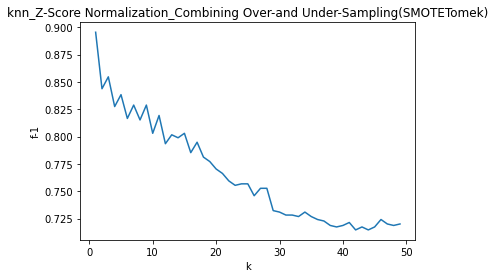

In [ ]:
# k값 변동에 따른 f-1 score 확인
k_list = range(1,50)
accuracies = []
for i in range(1):
    rds = 101
    training_data, validation_data , training_labels, validation_labels = train_test_split(X_train_over, y_train_over, test_size = 0.3, random_state = rds)
    for k in range(1, 50):
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(training_data, training_labels)
    #     score = knn.score(validation_data, validation_labels)
        y_pred = knn.predict(validation_data)
        f1 = f1_score(validation_labels, y_pred, average = 'micro')
        print('rdst: %d, k: %d, f1: %.2f' % (rds, k,f1*100))
        accuracies.append(f1_score(validation_labels, y_pred, average = 'micro'))
    #     print(classification_report(validation_labels, y_pred))
    #     print(confusion_matrix(validation_labels, y_pred))
plt.plot(k_list, accuracies)
plt.xlabel("k")
plt.ylabel("f-1")
plt.title("knn_Z-Score Normalization_Combining Over-and Under-Sampling(SMOTETomek)")
plt.show() 

k는?: 3


C:\Users\yoyoy\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


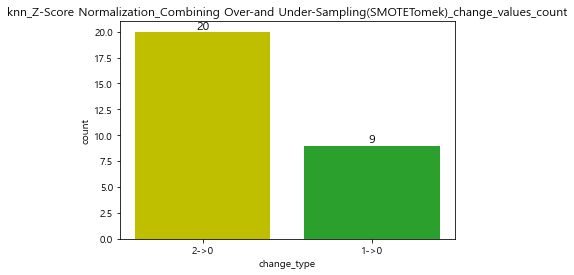

k: 3, f1_score: 79.77
[[ 99   0   0]
 [  9 260  32]
 [ 20 190 631]]


In [ ]:
#k 값 입력에 따른 전체 데이터셋 예측. 에측결과를 'new_labels'로 명칭하여 기존 데이터 셋에 붙여주기. 
if len(df.columns) != 28:
    del df['new_labels'] # 코드를 다시 돌릴경우 만약 이전에 실행한 흔적이 있다면 new_labels가 있기에 삭제.

k = int(input('k는?: '))
rds = 3 # randomstate
training_data, validation_data , training_labels, validation_labels = train_test_split(X_train_over, y_train_over, test_size = 0.3, random_state = rds)
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(training_data, training_labels)
y_pred = knn.predict(df_data) #전체 데이터로 예측
df['new_labels'] = y_pred
df_change = df[df['활성화_여부'] != df['new_labels']]
df_chage_to_0 = df_change[df_change['new_labels'] == 0] # 0으로 예측된 데이터들 따로 분류.
#시각화
x = np.arange(2)
change_type = ['2->0', '1->0']
values = [len(df_chage_to_0[df_chage_to_0['활성화_여부'] == 2]), len(df_chage_to_0[df_chage_to_0['활성화_여부'] == 1])]

plt.bar(x, values)
plt.xticks(x, change_type)
plt.xlabel("change_type")
plt.ylabel("count")
plt.title("knn_Z-Score Normalization_Combining Over-and Under-Sampling(SMOTETomek)_change_values_count")
colors = ['y', 'C2']
bar = plt.bar(x, values, color=colors)
# 바차트 위에 수치 출력
for rect in bar:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, height, ha='center', va='bottom', size = 12)

plt.show()
print('k: %d, f1_score: %.2f' % (k, f1_score(df_labels, y_pred, average = 'micro') * 100))
print(confusion_matrix(df_labels, y_pred))


In [ ]:
#df.to_csv('knn_new_labels.csv', encoding="utf-8-sig")
# 예측 결과('new_labels')를 기존 데이터셋에 붙인 데이터프레임 csv로 저장.

# train셋 테스트

In [ ]:
#학습했던 데이터들을 그대로 예측. 8,90대의 f1-score 요망.
y_pred = knn.predict(training_data)
print('k: %d, f1_score: %.2f' % (k, f1_score(training_labels, y_pred, average = 'micro') * 100))
print(confusion_matrix(training_labels, y_pred))

k: 3, f1_score: 92.48
[[574   0   0]
 [  5 543  22]
 [ 11  91 469]]


# 비교 시각화

In [ ]:
# 시각화 한글 인코딩.
from matplotlib import font_manager, rc

import matplotlib

font_location='c:/Windows/fonts/malgun.ttf'

font_name=font_manager.FontProperties(fname=font_location).get_name()

matplotlib.rc('font',family=font_name)

In [ ]:
# 시각화 데이터셋 전처리
df_1 = df.iloc[:,3:]

In [ ]:
# 시각화 데이터셋 전처리
del df_1['개인카페_비율']
del df_1['상권_코드']
del df_1['상권_코드_명']

In [ ]:
# 시각화 데이터셋 전처리
df_1 = df_1[df_1['상권_구분_코드'] == 'A']
#골목상권만 뽑기

In [ ]:
# 시각화 데이터셋 전처리
del df_1['상권_구분_코드']

In [ ]:
# 시각화시 데이터 범위를 통일하기위해 z-점수 정규화 적용.
for x in df_1.columns:
    if x =='활성화_여부':
        break
    df_1[x] = z_score_normalize(df_1[x])

In [ ]:
# 원래 결과변수가 0인 데이터들 분류.
df_original_0 = df_1[df_1['활성화_여부'] == 0]

In [ ]:
# 시각화 데이터셋 전처리
del df_original_0['활성화_여부']
del df_original_0['new_labels']

In [ ]:
# 시각화 데이터셋 전처리
# 기존 0인 데이터들 평균치 저장.
mean_list = []
for i in range(len(df_original_0.mean())):
    mean_list.append(df_original_0.mean()[i])

In [ ]:
#기존 1에서 0으로 예측된 데이터들 분류
# 시각화 데이터셋 전처리
df_1_to_0_ = df_1[(df_1['활성화_여부'] == 1) & (df_1['new_labels'] == 0)]

In [ ]:
# 시각화 데이터셋 전처리
del df_1_to_0_['활성화_여부']
del df_1_to_0_['new_labels']

In [ ]:
#1->0변화 상권 평균
mean_list2 = []
for i in range(len(df_1_to_0_.mean())):
    mean_list2.append(df_1_to_0_.mean()[i])

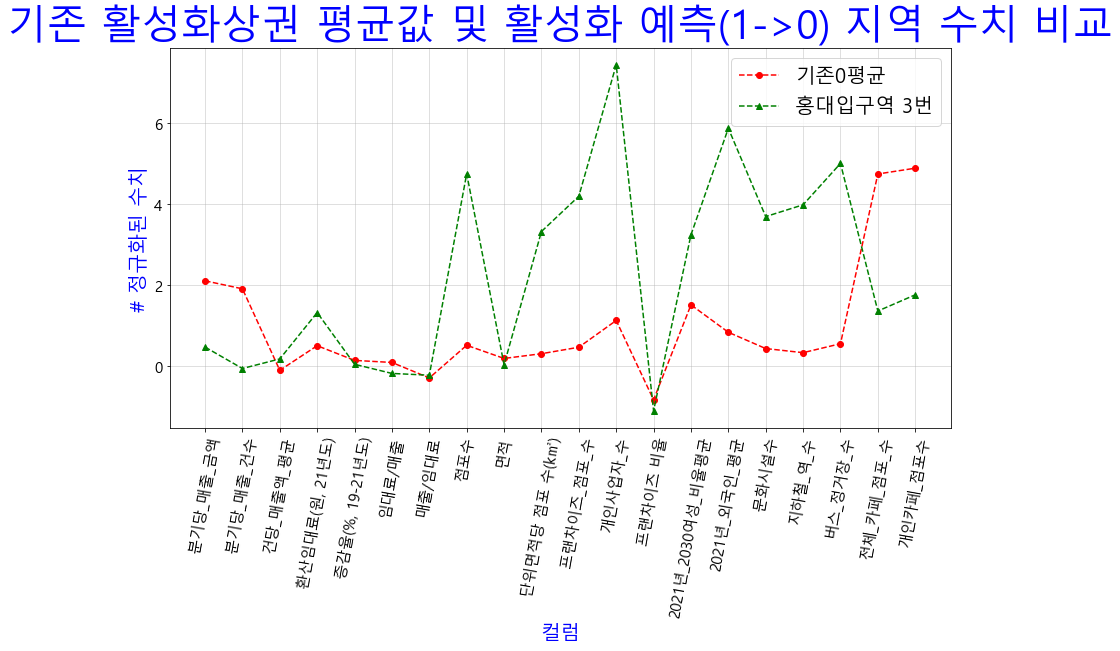

None


C:\Users\yoyoy\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


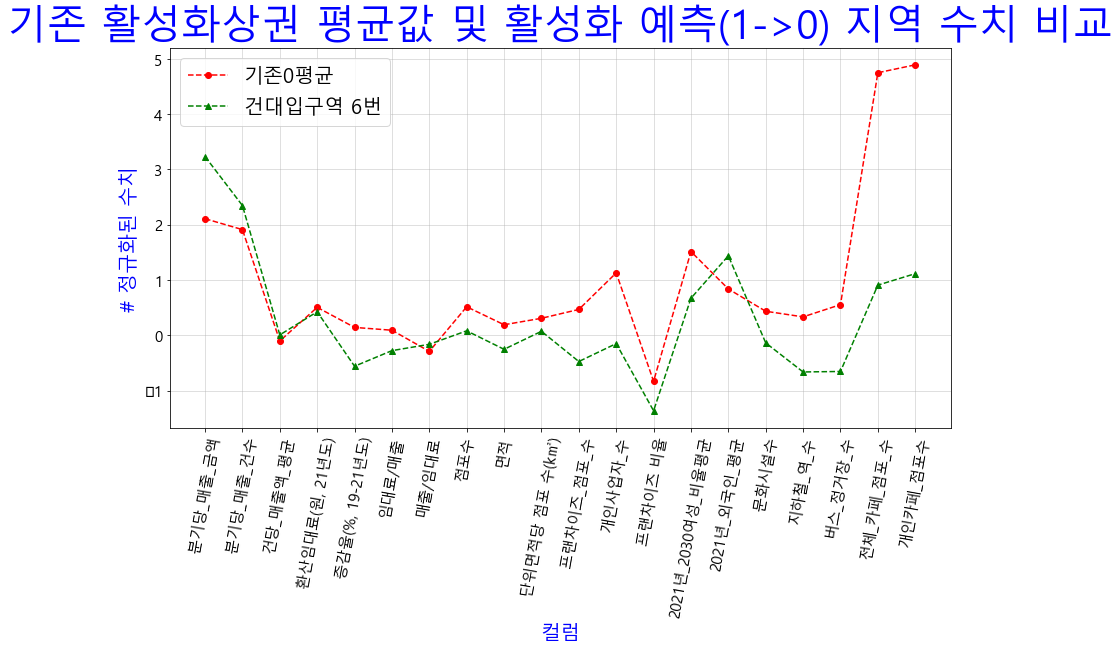

None


C:\Users\yoyoy\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


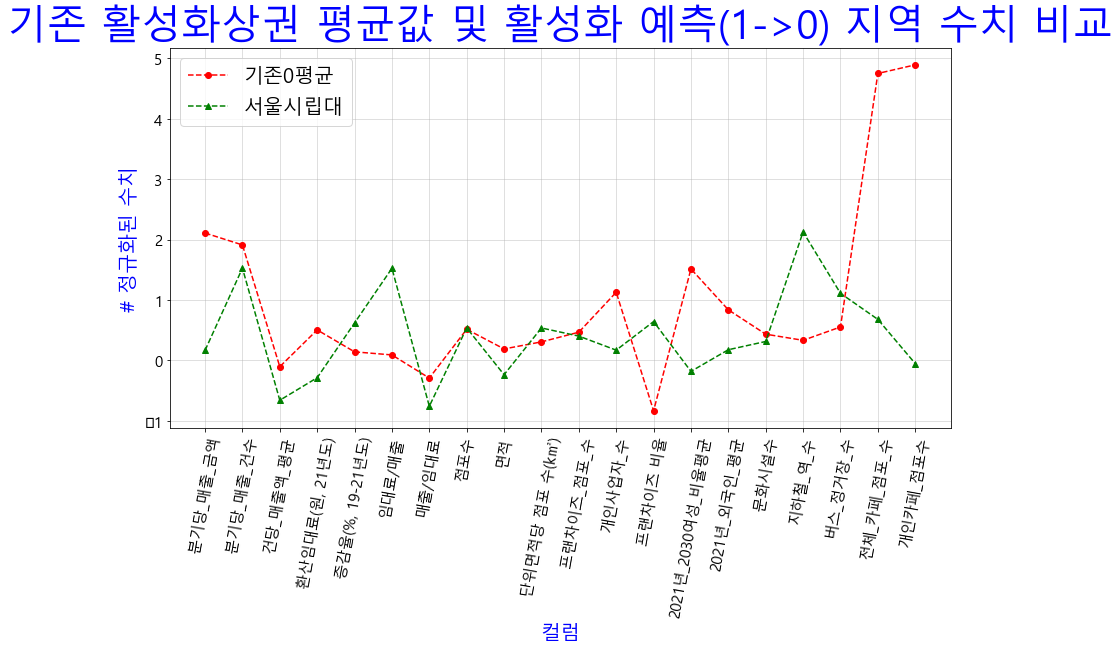

None


In [ ]:
#반복문을 통해 기존 1에서 0으로 예측된 골목상권들만 기존 0인 데이터의 평균치와 비교 시각화.
for index_to_0 in range(len(df_1_to_0_)):
    value_list = []
    for i in range(len(df_1_to_0_.columns)):
        value_list.append(df_1_to_0_.iloc[index_to_0,i])
    index_ = df_1_to_0_.index[index_to_0]
    from_1_name = df.loc[index_, '상권_코드_명']
    
    #시각화 코드
    plt.figure(figsize=(14,7))
    plt.plot(df_original_0.columns, mean_list,ls='dashed',color='red', marker='o', label='기존0평균')
    plt.plot(df_original_0.columns, value_list,ls='dashed',color='green', marker='^', label=from_1_name)
    plt.xlabel('컬럼', size=20, color='blue')
    plt.ylabel("# 정규화된 수치", size=20, color='blue')
    plt.title('기존 활성화상권 평균값 및 활성화 예측(1->0) 지역 수치 비교', size=40, color='blue')
    plt.grid(alpha=0.5)
    plt.xticks(rotation=80, size=15)
    plt.yticks(size=15)
    plt.legend(fontsize=20)
    print(plt.show())

C:\Users\yoyoy\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


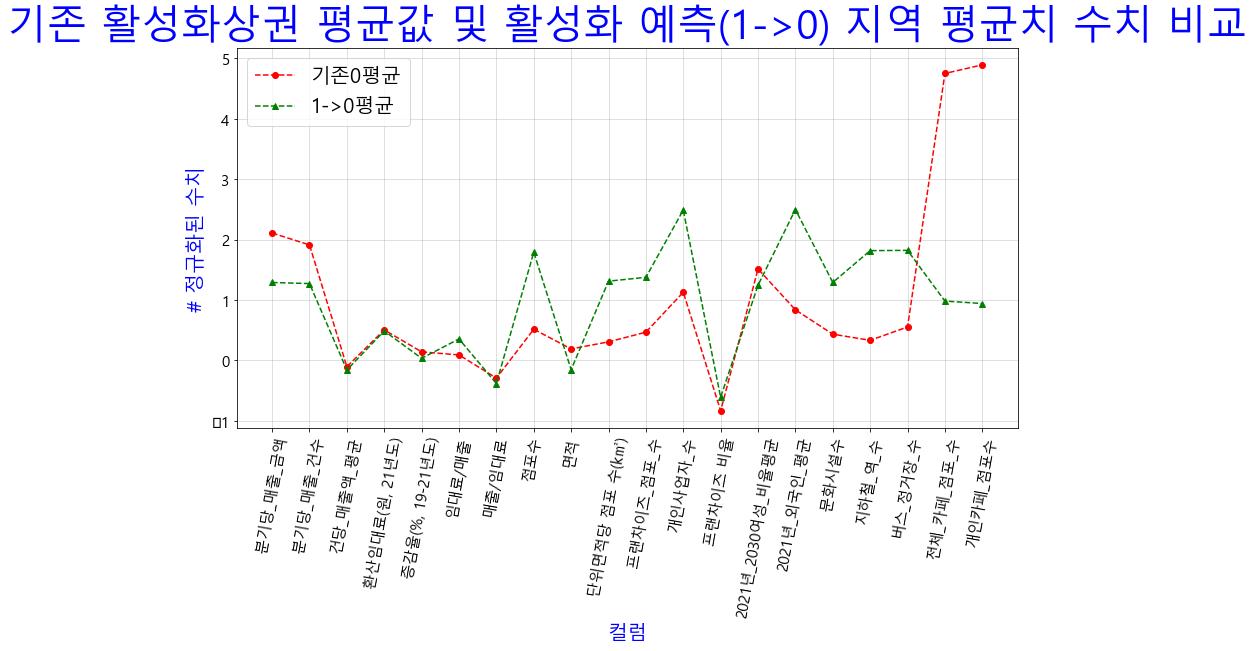

None


In [ ]:
#기존 0인 데이터들의 평균치와 1에서 0으로 예측된 데이터들의 평균치 비교 시각화.
plt.figure(figsize=(14,7))
plt.plot(df_original_0.columns, mean_list,ls='dashed',color='red', marker='o', label='기존0평균')
plt.plot(df_original_0.columns, mean_list2,ls='dashed',color='green', marker='^', label='1->0평균')
plt.xlabel('컬럼', size=20, color='blue')
plt.ylabel("# 정규화된 수치", size=20, color='blue')
plt.title('기존 활성화상권 평균값 및 활성화 예측(1->0) 지역 평균치 수치 비교', size=40, color='blue')
plt.grid(alpha=0.5)
plt.xticks(rotation=80, size=15)
plt.yticks(size=15)
plt.legend(fontsize=20)
print(plt.show())

In [ ]:
# 기존 2에서 0으로 예측된 데이터들 분류.
#아래의 코드는 위의 코드와 같다.
df_2_to_0_ = df_1[(df_1['활성화_여부'] == 2) & (df_1['new_labels'] == 0)]

In [ ]:
del df_2_to_0_['활성화_여부']
del df_2_to_0_['new_labels']

C:\Users\yoyoy\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


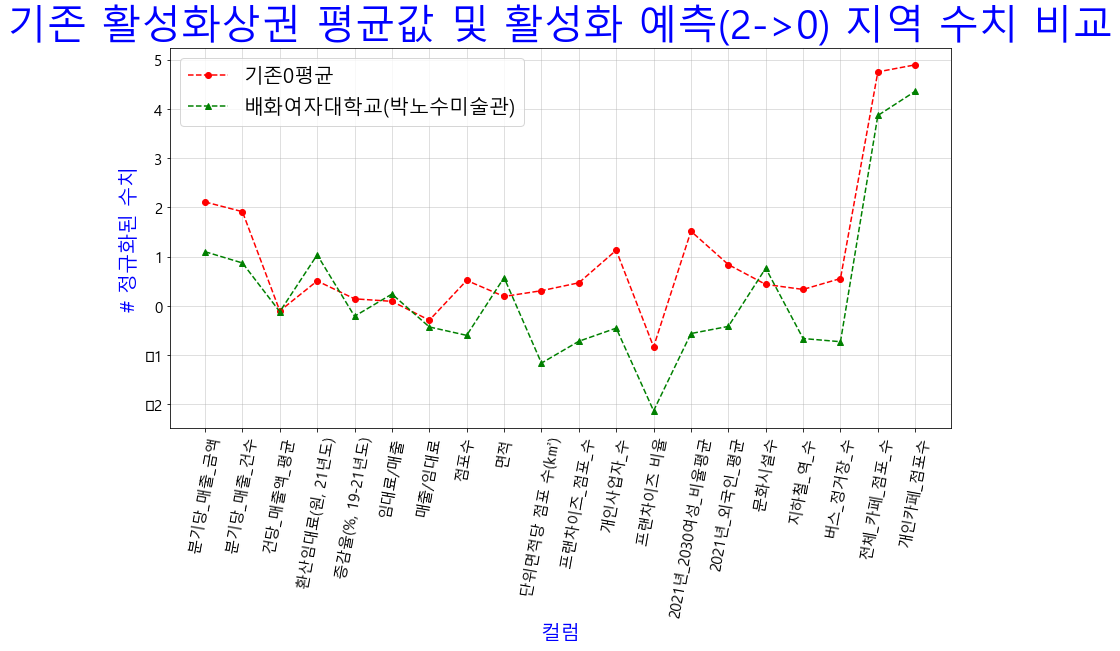

C:\Users\yoyoy\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


None


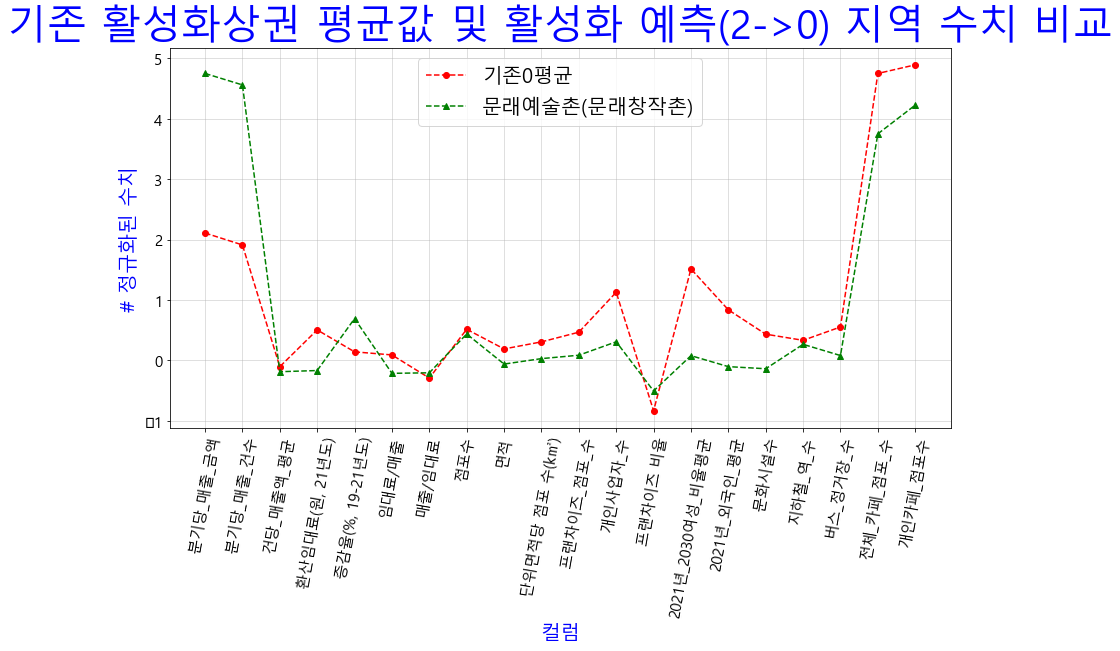

C:\Users\yoyoy\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


None


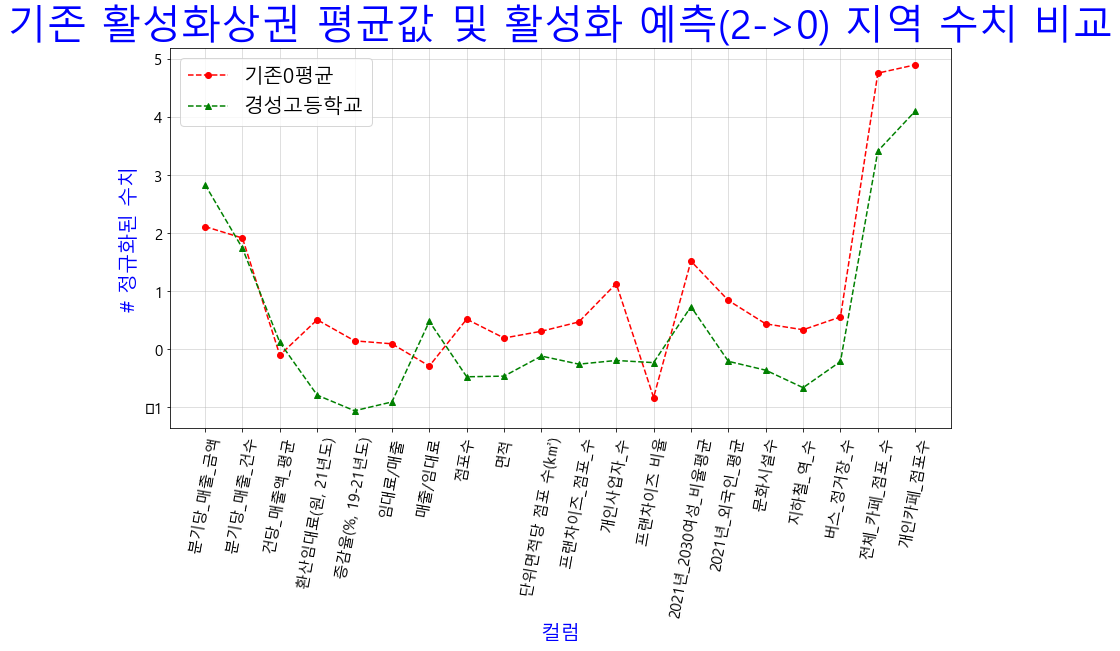

None


C:\Users\yoyoy\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


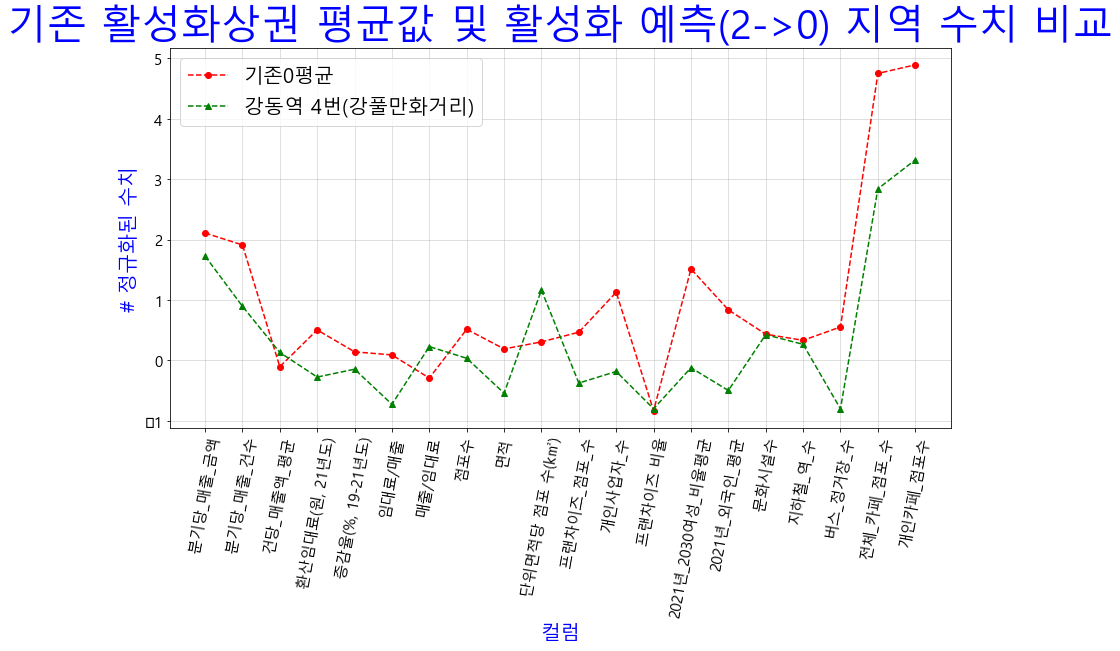

C:\Users\yoyoy\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


None


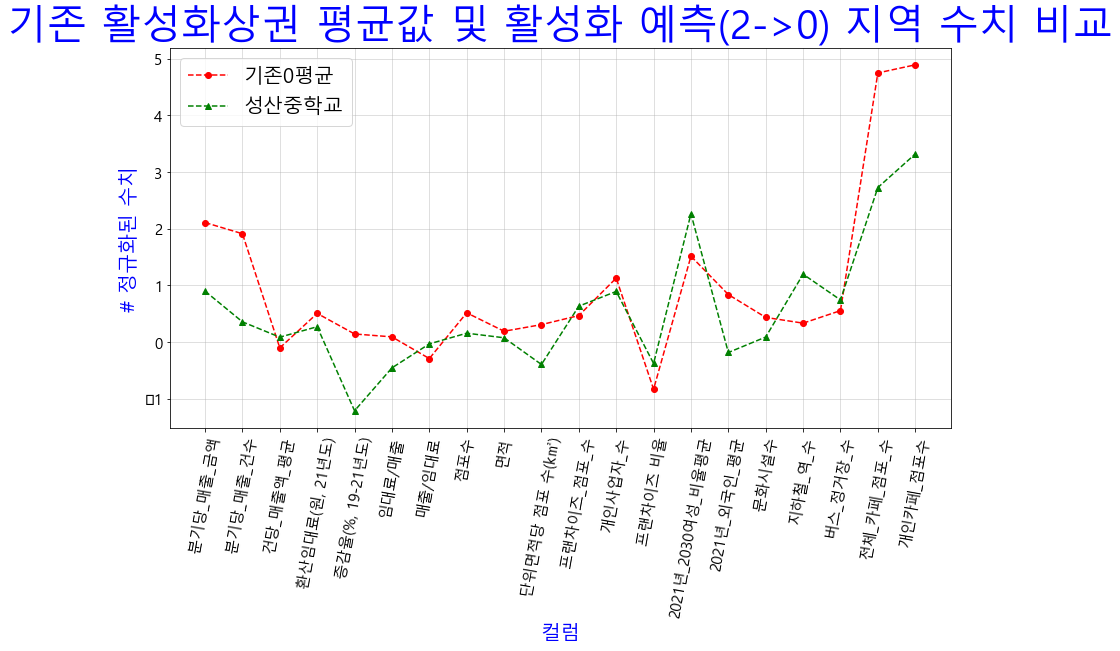

None


C:\Users\yoyoy\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


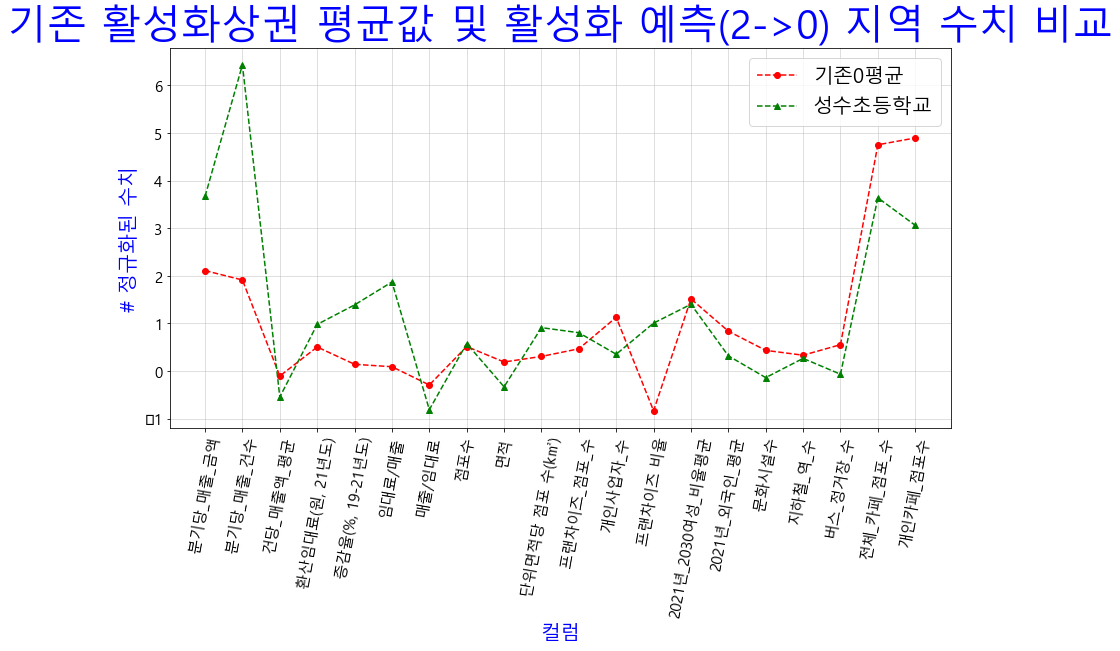

C:\Users\yoyoy\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


None


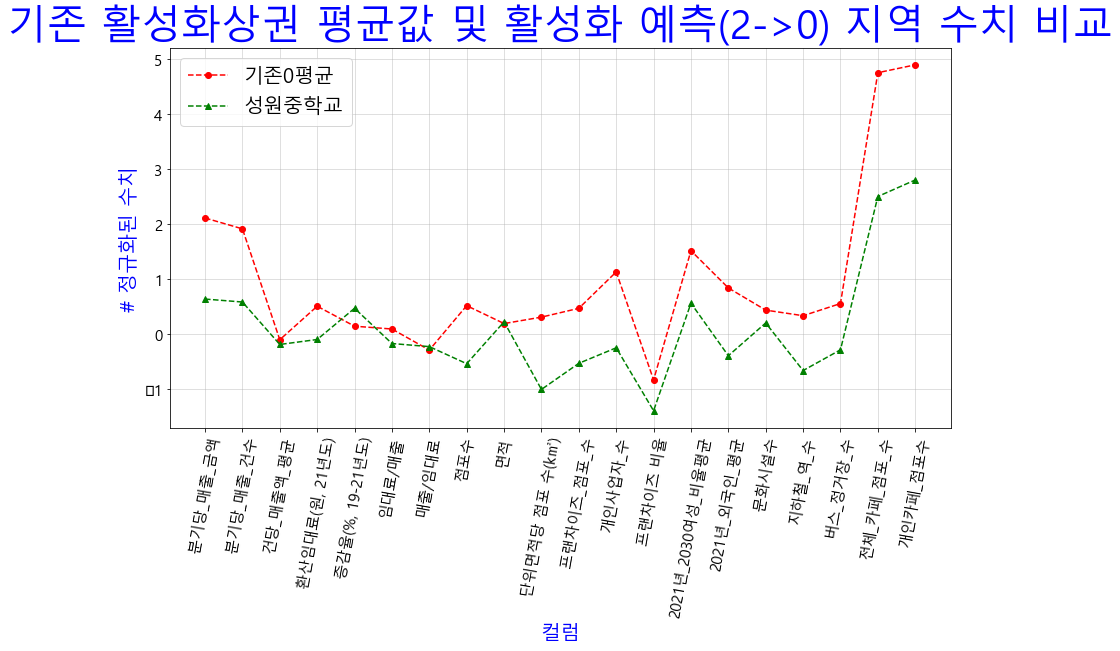

None


C:\Users\yoyoy\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


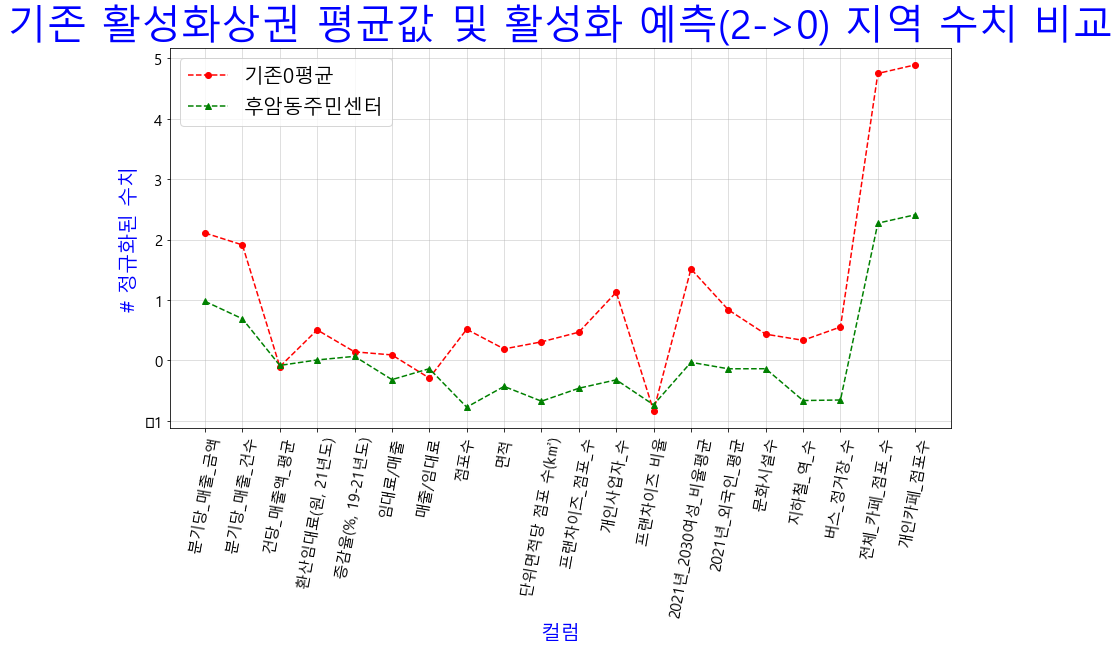

None


C:\Users\yoyoy\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


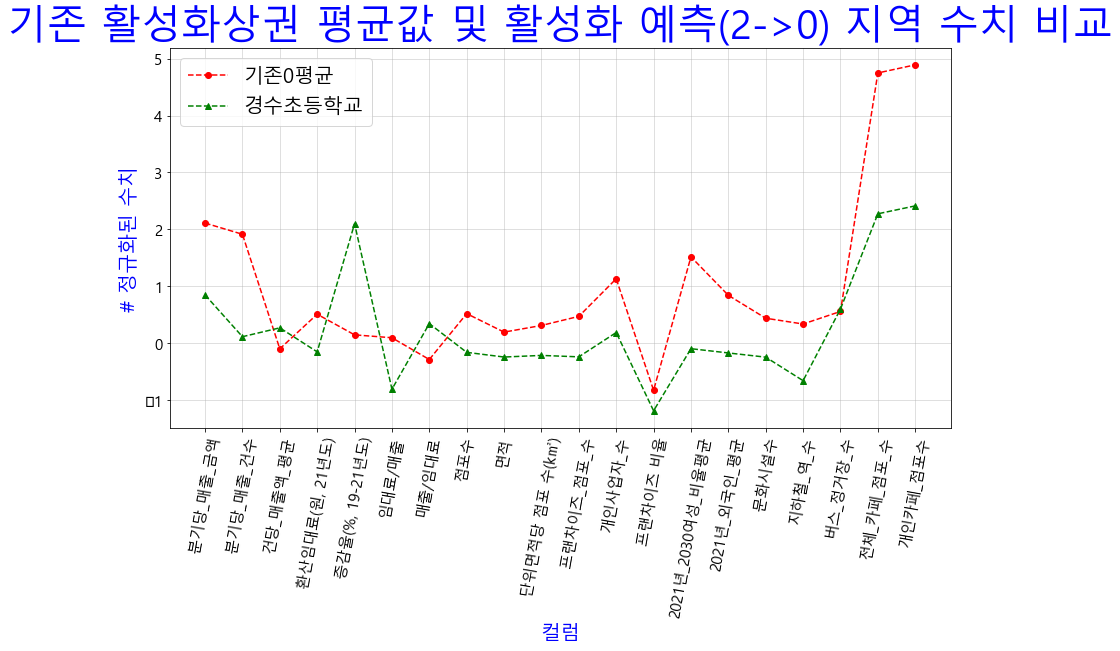

None


C:\Users\yoyoy\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


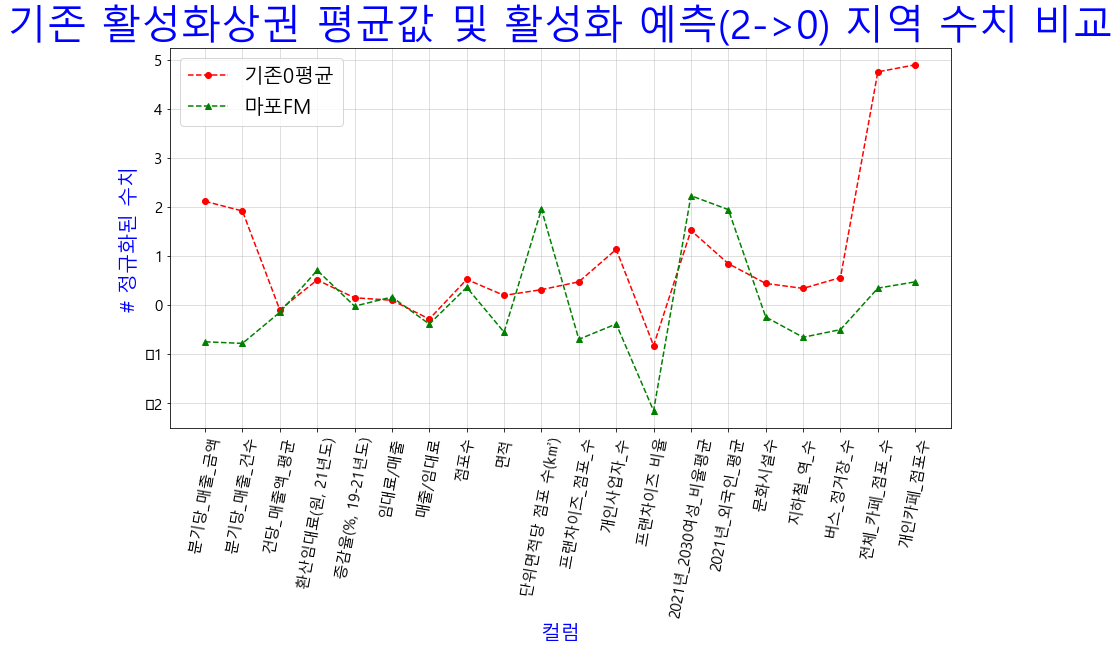

None


In [ ]:
for index_to_0 in range(len(df_2_to_0_)):
    value_list = []
    for i in range(len(df_2_to_0_.columns)):
        value_list.append(df_2_to_0_.iloc[index_to_0,i])
    index_ = df_2_to_0_.index[index_to_0]
    from_2_name = df.loc[index_, '상권_코드_명']
    
    plt.figure(figsize=(14,7))
    plt.plot(df_original_0.columns, mean_list,ls='dashed',color='red', marker='o', label='기존0평균')
    plt.plot(df_original_0.columns, value_list,ls='dashed',color='green', marker='^', label=from_2_name)
    plt.xlabel('컬럼', size=20, color='blue')
    plt.ylabel("# 정규화된 수치", size=20, color='blue')
    plt.title('기존 활성화상권 평균값 및 활성화 예측(2->0) 지역 수치 비교', size=40, color='blue')
    plt.grid(alpha=0.5)
    plt.xticks(rotation=80, size=15)
    plt.yticks(size=15)
    plt.legend(fontsize=20)
    print(plt.show())

In [ ]:
#2->0변화 상권 평균
mean_list3 = []
for i in range(len(df_2_to_0_.mean())):
    mean_list3.append(df_2_to_0_.mean()[i])

C:\Users\yoyoy\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


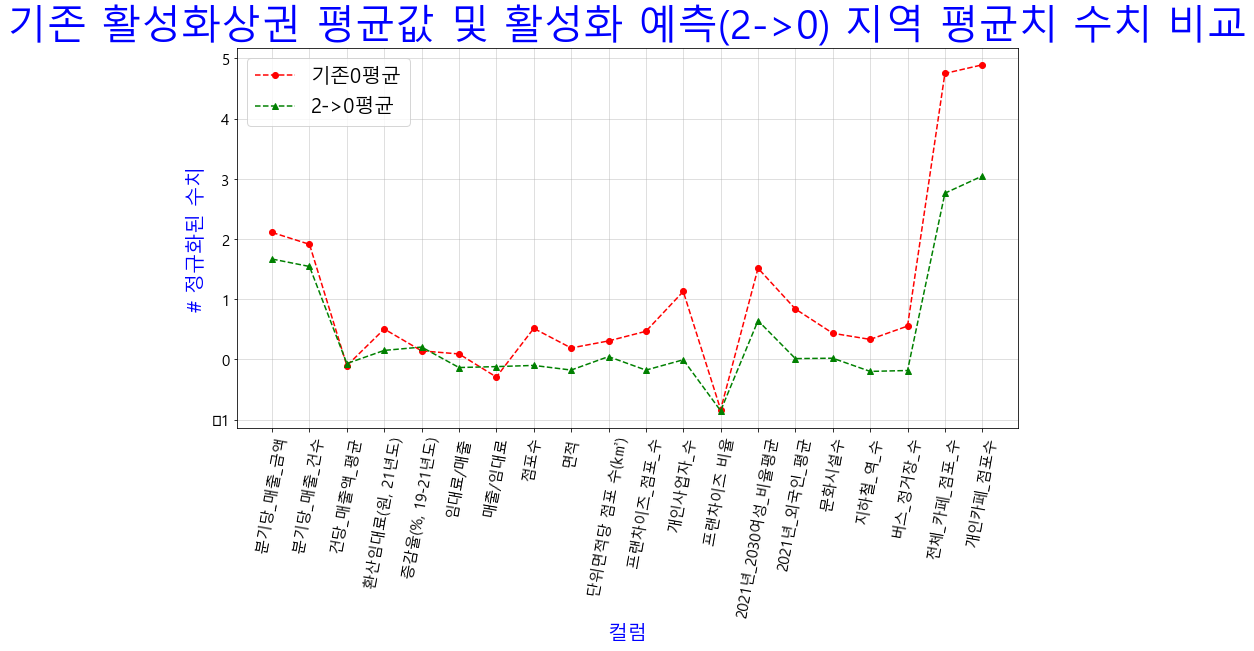

None


In [ ]:
plt.figure(figsize=(14,7))
plt.plot(df_original_0.columns, mean_list,ls='dashed',color='red', marker='o', label='기존0평균')
plt.plot(df_original_0.columns, mean_list3,ls='dashed',color='green', marker='^', label='2->0평균')
plt.xlabel('컬럼', size=20, color='blue')
plt.ylabel("# 정규화된 수치", size=20, color='blue')
plt.title('기존 활성화상권 평균값 및 활성화 예측(2->0) 지역 평균치 수치 비교', size=40, color='blue')
plt.grid(alpha=0.5)
plt.xticks(rotation=80, size=15)
plt.yticks(size=15)
plt.legend(fontsize=20)
print(plt.show())